# Uranus models with strict constraints

In [1]:
import numpy as np
import observables
import ppwd
import TOFPlanet
import generic_priors
import losses
import ahelpers as ah
import samplooker as spl

import matplotlib.pyplot as plt
plt.style.use('ndefault')
%matplotlib inline

In [2]:
from scipy.stats import norm, chi2

In the `BLU` sample $J_2$ and $J_4$ are independently constrained to their respective $\pm{2.5}\sigma$.

In the `RED` sample, $r_{J_6=0.5}(J_2,J_4) \le 2$.

In [3]:
BLU = ah.load_planets('uranus/perpres_fixref_uncon_ppwd/deg6_tof4_J4_obs0S_PV_planets.pickle')
RED = ah.load_planets('uranus/perpres_fixref_uncon_ppwd/deg6_tof4_J4_FR0p5J6S_PV_planets.pickle')
obs = observables.Uranus()

Found 1000 planets in uranus/perpres_fixref_uncon_ppwd/deg6_tof4_J4_obs0S_PV_planets.pickle.
Found 1000 planets in uranus/perpres_fixref_uncon_ppwd/deg6_tof4_J4_FR0p5J6S_PV_planets.pickle.


## The $J_2$-$J_4$ plane view shows a stark difference.

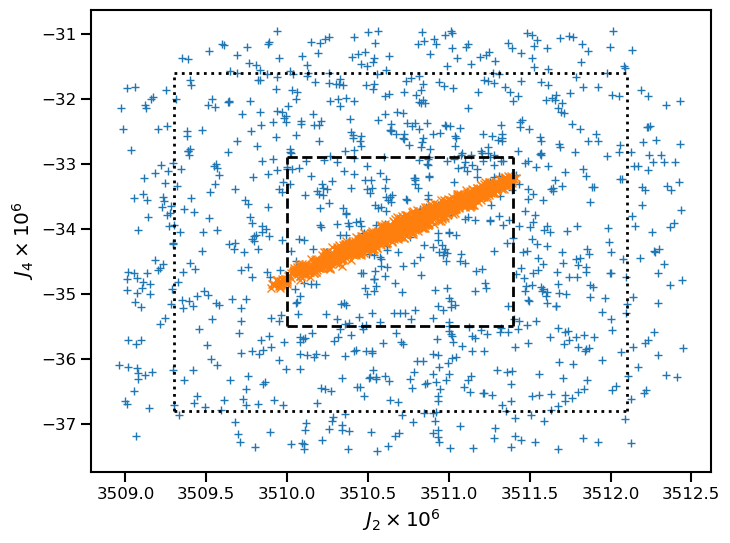

In [4]:
J2blu = np.array([p.Js[1] for p in BLU])
J4blu = np.array([p.Js[2] for p in BLU])
J2red = np.array([p.Js[1] for p in RED])
J4red = np.array([p.Js[2] for p in RED])

plt.figure(figsize=(8,6))

plt.plot(J2blu*1e6, J4blu*1e6, '+')
plt.plot(J2red*1e6, J4red*1e6, 'x')
plt.xlabel(r'$J_2\times{10}^{6}$')
plt.ylabel(r'$J_4\times{10}^{6}$')

jline = lambda n, s: (obs.Js[n//2] + s*obs.dJs[n//2])*1e6
plt.vlines((jline(2,-1),jline(2,+1)), jline(4,-1), jline(4,+1), color='k', ls='--')
plt.hlines((jline(4,-1),jline(4,+1)), jline(2,-1), jline(2,+1), color='k', ls='--')
plt.vlines((jline(2,-2),jline(2,+2)), jline(4,-2), jline(4,+2), color='k', ls=':')
plt.hlines((jline(4,-2),jline(4,+2)), jline(2,-2), jline(2,+2), color='k', ls=':')

## The survival function confirms that the tempering scheme oversamples large deviations

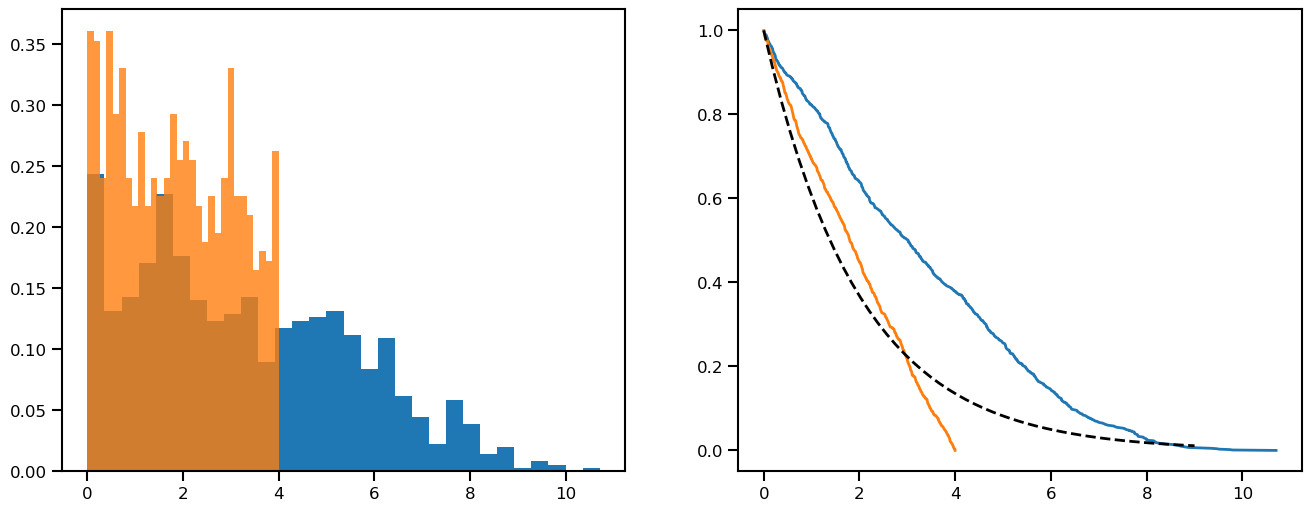

In [5]:
x2blu = (J2blu - obs.J2)/obs.dJ2
x4blu = (J4blu - obs.J4)/obs.dJ4
rsblu = x2blu**2 + x4blu**2
rsred = np.array([losses._french23(p, obs)**2 for p in RED])
N = rsred.size
ecdf = np.arange(1, N+1)/N # empirical CDF assuming no repeated values

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(rsblu, density=True)
plt.hist(rsred, density=True, alpha=0.8);

plt.subplot(1,2,2)
plt.plot(np.sort(rsblu), 1 - ecdf)
plt.plot(np.sort(rsred), 1 - ecdf);
plt.plot(np.linspace(0,9), chi2.sf(np.linspace(0,9), 2), 'k--');

## The relative frequencies of any derived quantities in the sample are not what we are after

The uranus models in each sample are not distributed according to a meaningful posterior. But we do have some confidence that they cover the space of allowable density profiles given the $J$ constraints. In other words, the limits, or envelope, of quantities from each sample are what we are after.

### I call this the density envelope view

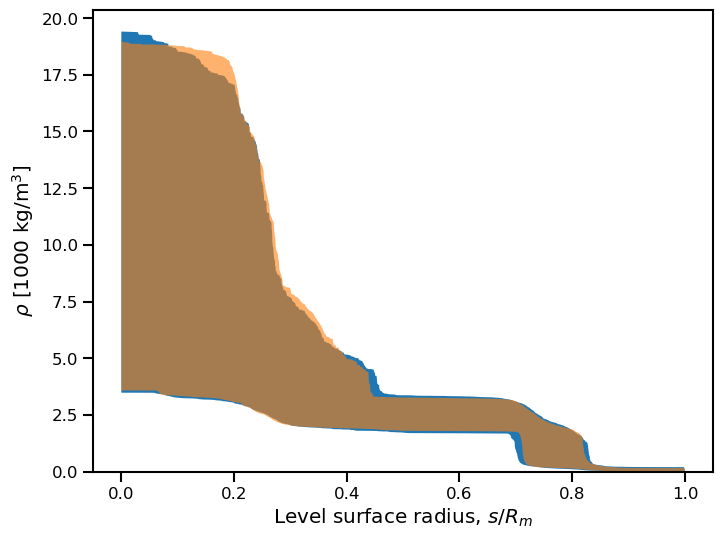

In [6]:
spl.density_envelope(BLU, show=False)
spl.density_envelope(RED, show=False, alpha=0.6)

### This is the barotrope view

C:\Users\nmovs\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


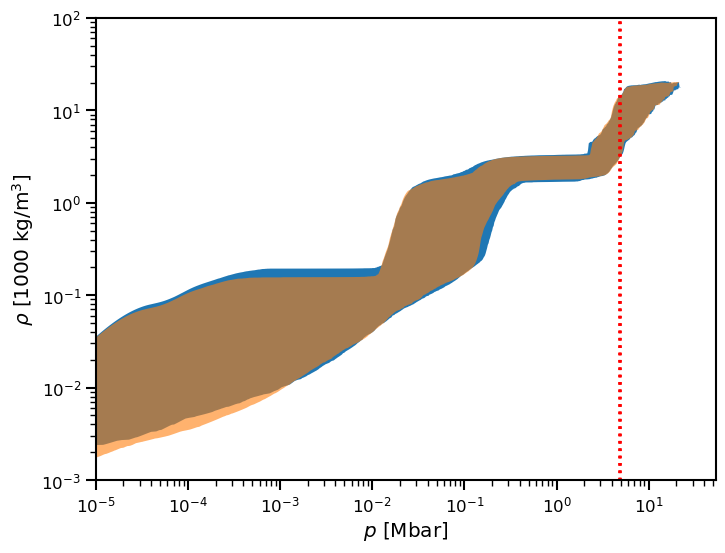

In [7]:
spl.barotrope_envelope(BLU, show=False)
spl.barotrope_envelope(RED, show=False, alpha=0.6)

### I like to check the MoI values using a hist; remember to not rely on the relative frequencies though

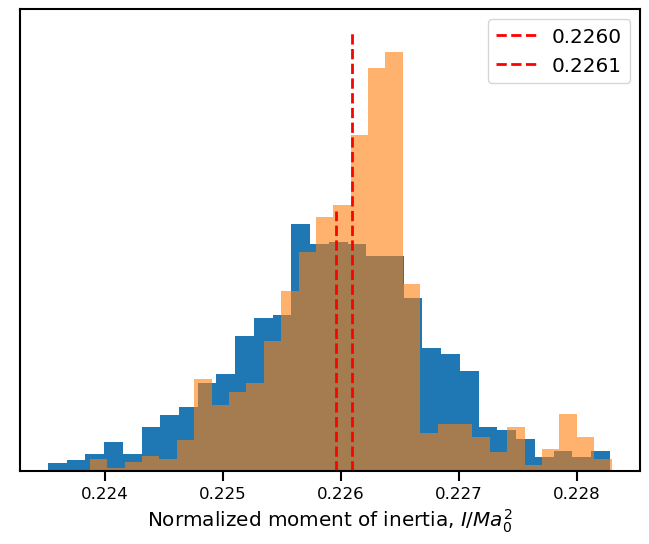

In [8]:
spl.hist_moi(BLU, show=False)
spl.hist_moi(RED, show=False, alpha=0.6);